# 1. Identifying fraudulent claims

You have a project with a new customer who has asked you to find a way to prioritize suspicious claims on the motor line of business, in order to help the investigators of the company on their daily work.

You have already started the project with the customer and after some initial meetings it has been possible to identify what data is needed and what data is available. Finally they have delivered to you the data in a csv file called claims.csv.



# 2. Data

The data that you will find here has the following information

|| |||
| --- ||||
| monthsascustomer | age | policy_number | policybinddate |
| policy_state | policy_csl | policy_deductable | policyannualpremium |
| umbrella_limit | insured_zip | insured_sex | insurededucationlevel |
| insured_occupation | insured_hobbies | insured_relationship | capital-gains |
| capital-loss | incident_date | incident_type | collision_type |
| incident_severity | authorities_contacted | incident_state | incident_city |
| incident_location | incidenthouroftheday | numberofvehicles_involved | property_damage |
| bodily_injuries | witnesses | policereportavailable | totalclaimamount |
| injury_claim | property_claim | vehicle_claim | auto_make |
| auto_model | auto_year | fraud_reported | _c39] |

# 3. Solution

Now is your turn. In the next step you need to develop a prototype with this data and show the customer your results and try to convince them that your model will offer an added value to the company. Good luck!!

In [1]:
import pandas as pd

In [2]:
claims = pd.read_csv('claims.csv')

In [3]:
# generate a report of all the variables the exist in the dataframe
# from pandas_profiling import ProfileReport

#profile = ProfileReport(claims, title="Pandas Profiling Report")
# profile.to_file("output.html")

In [4]:
# take a quick look over the data
claims.head().T

,0,1,2,3,4
months_as_customer,187,243,24,215,85
age,37,44,33,42,30
policy_number,125591,967713,649082,519312,190588
policy_bind_date,2013-08-08,1997-12-25,1996-01-19,2008-10-28,2001-12-09
policy_state,IN,IL,IL,OH,OH
policy_csl,500/1000,250/500,500/1000,500/1000,100/300
policy_deductable,1000,500,1000,500,1000
policy_annual_premium,1412.06,809.11,1922.84,1848.81,796.35
umbrella_limit,5000000,0,0,0,0
insured_zip,450947,600208,431277,435489,614166


In [5]:
# scale the data that got money
variable_to_scale = ["policy_annual_premium", "umbrella_limit", "capital-gains",
    "capital-loss", "total_claim_amount", "injury_claim",
    "property_claim", "vehicle_claim"] # create a variable beween the total_claim_amount

# columns to drop
to_drop = ["policy_number", "_c39", "incident_location"] # for future ideas could be nice to get a more general location

# create label encoders
to_le = ["policy_state", "policy_csl", "policy_deductable", "insured_zip",
 "insured_sex", "insured_education_level", "insured_occupation",
 "insured_hobbies", "insured_relationship", "incident_type",
 "collision_type", "incident_severity", "authorities_contacted",
 "incident_state", "incident_city", "property_damage", "police_report_available",
 "auto_make", "auto_model"]

# date colunns
date_columns = ["policy_bind_date", "incident_date"]

# TODO: generate variables:
# amount claimed divided by the mean amount of claims by city
# day of the week
# holliday

['policy_bind_date', 'incident_date']

In [6]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder for each variable
le = LabelEncoder()
claims[to_le] = claims[to_le].apply(le.fit_transform)

In [7]:
claims = claims.drop(columns=to_drop)

In [8]:
for datecol in date_columns:
    claims[datecol] = pd.to_datetime(claims[datecol])

In [9]:
def split_date(df, col):
    """split date column into year, month, day

    Args:
        df (pd.DataFrame): DataFrame that got the date column
        col (string):name of the date column

    Returns:
        tuple: three arrays with the year, month, day 
    """
    return df[col].dt.year, df[col].dt.month, df[col].dt.day

# apply the function to the date columns
for datecol in date_columns:
    claims['year_'+datecol], claims['month_'+datecol], claims['day_'+datecol] = split_date(claims, datecol)
claims_dropped_dates = claims.drop(columns=date_columns)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

claims_dropped_dates[variable_to_scale] = scaler.fit_transform(claims_dropped_dates[variable_to_scale])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(claims_dropped_dates.drop(columns=['fraud_reported']),
                                                                claims_dropped_dates.fraud_reported,
                                                                train_size=0.87,
                                                                random_state=42)

clf = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42).fit(X_train, y_train)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import f1_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def plot_cm(cf_matrix):
    """plot confusion matrix

    Args:
        cf_matrix (list): a list of lists with the confusion matrix
    """
    # from: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/ 
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

def get_metrics(model, X_test, y_test):
    """plot the values of the more important metrics for this problem

    Args:
        model (model): trained machine learning model
        X_test (np.array): testing_data
        y_test (np.array): testing_objective
    """
    preds = model.predict(X_test)
    predictions_probs = model.predict_proba(X_test)
    print("Model Accurary: ", model.score(X_test, y_test))
    print("Model F1 Score: ", f1_score(y_test, preds))
    print("Model Recall Score: ", recall_score(y_test, preds))
    print("Model AUC Score: ", roc_auc_score(y_test, predictions_probs[:,1]))
    plot_cm(confusion_matrix(y_test, preds))

Model Accurary:  0.8131868131868132
Model F1 Score:  0.5405405405405405
Model Recall Score:  0.47619047619047616
Model AUC Score:  0.8183673469387754


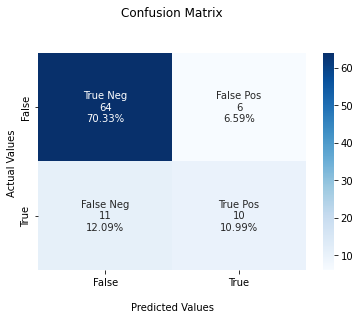

In [13]:
get_metrics(clf, X_test, y_test)

In [14]:
#created columns (data engineering part)
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# create a variable that checks how far away or value is against the mean of total_claim_amount by city
claims["total_claim_ratio_with_mean"] = claims.apply(lambda x: x["total_claim_amount"]/claims[claims["incident_city"] == x["incident_city"]]["total_claim_amount"].mean(), axis=1)

cal = calendar()
holidays = cal.holidays(start=claims["incident_date"].min(), end=claims["incident_date"].max(),)

# create a variable that has the day of the week of the incident
claims["dow"] = claims["incident_date"].dt.dayofweek
# create a variable that check if the incident date is a holiday or not
claims["is_holiday"] = claims["incident_date"].isin(holidays)

# create variables that represent the percentage of every type of claim given the total amount
claims['percentage_injury_claim'] = claims['injury_claim']/claims['total_claim_amount'] 
claims['percentage_property_claim'] = claims['property_claim']/claims['total_claim_amount'] 
claims['percentage_vehicle_claim'] = claims['vehicle_claim']/claims['total_claim_amount'] 

claims = claims.drop(columns=['policy_bind_date', 'incident_date'])

# save the dataframe with feature engineering to apply the minmaxscaler, given that we are going to use a linear regression
claims_fe = claims.copy()
claims_fe[variable_to_scale] = scaler.fit_transform(claims_fe[variable_to_scale])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(claims_fe.drop(columns=['fraud_reported']),
                                                                claims_fe.fraud_reported,
                                                                train_size=0.87,
                                                                random_state=42)

clf = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42).fit(X_train, y_train)

Model Accurary:  0.8241758241758241
Model F1 Score:  0.5789473684210527
Model Recall Score:  0.5238095238095238
Model AUC Score:  0.8142857142857143


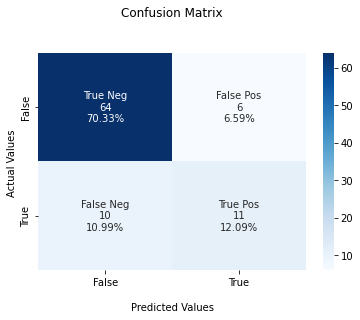

In [16]:
get_metrics(clf, X_test, y_test)

In [19]:
 #!pip install catboost
# !pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 23.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 127.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 23.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 KB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491071 sha256=97d04ccc73ea5101b6fd04392258991c7cd0051e250557b1023bb0469446121b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9bux76ys/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built future


In [20]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [21]:
X_train_total, X_test, y_train_total, y_test = train_test_split(claims.drop(columns=['fraud_reported']),
                                                                claims.fraud_reported,
                                                                train_size=0.87,
                                                                random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_total, y_train_total, train_size=0.85, random_state=42)

In [22]:
# check the spliting of the dataset
print(X_train.shape[0]/claims.shape[0])
print(X_validation.shape[0]/claims.shape[0])
print(X_test.shape[0]/claims.shape[0])

0.7385714285714285
0.13142857142857142
0.13


In [23]:
import hyperopt


def hyperopt_objective(params):
    """function to define the objective for hyperopt

    Args:
        params (dictionary): dictionary with the value of the parameters

    Returns:
        float: value with the score of the model
    """
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        max_depth=int(params['max_depth']),
        eval_metric=metrics.AUC(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.CrossEntropy(),
    )
    
    cv_data = cv(
        Pool(X_train_total, y_train_total, cat_features=categorical_features_indices),
        model.get_params(),
        logging_level='Silent',
    )
    best_auc = np.max(cv_data['test-AUC-mean'])
    return 1 - best_auc

In [24]:
from numpy.random import default_rng
# this part is commented because it takes a long time to run

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
    # 'class_weights': hyperopt.hp.choice('class_weights', [[1, 1], [1, 3], [1, 5], [1, 50], [1, 100], [1, 1000]]),
    'max_depth': hyperopt.hp.uniform('max_depth', 3, 16)
}

# trials = hyperopt.Trials()

# best = hyperopt.fmin(
#     hyperopt_objective,
#     space=params_space,
#     algo=hyperopt.tpe.suggest,
#     max_evals=50,
#     trials=trials,  
#     rstate=default_rng(42)
# )

# print(best)

# these are the best parameters that I found

# {'l2_leaf_reg': 1.0, 'learning_rate': 0.47785165937061697, 'max_depth': 5}

In [25]:
from catboost import CatBoostClassifier, metrics, Pool


# adding weights and recall to fight the data imbalance

model = CatBoostClassifier(
    custom_loss=[metrics.AUC(), metrics.Recall()],
    l2_leaf_reg=1,
    learning_rate=0.477,
    max_depth=5,
    iterations=500,
    class_weights=[1, 3],
    task_type='GPU',
    random_seed=42,
    logging_level='Silent'
)

In [26]:
import numpy as np
categorical_features_indices = np.where(claims.drop(columns=['fraud_reported']).dtypes != float)[0]

In [27]:
model.fit(
    X_train_total, y_train_total,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    logging_level='Verbose'
)

0:	learn: 0.5552469	test: 0.4839115	best: 0.4839115 (0)	total: 53.8ms	remaining: 26.9s
1:	learn: 0.4949503	test: 0.4130064	best: 0.4130064 (1)	total: 107ms	remaining: 26.6s
2:	learn: 0.4831883	test: 0.4059130	best: 0.4059130 (2)	total: 150ms	remaining: 24.8s
3:	learn: 0.4624524	test: 0.3979836	best: 0.3979836 (3)	total: 198ms	remaining: 24.5s
4:	learn: 0.4382202	test: 0.3536539	best: 0.3536539 (4)	total: 255ms	remaining: 25.2s
5:	learn: 0.4120325	test: 0.3516003	best: 0.3516003 (5)	total: 308ms	remaining: 25.3s
6:	learn: 0.3797400	test: 0.3380846	best: 0.3380846 (6)	total: 352ms	remaining: 24.8s
7:	learn: 0.3739644	test: 0.3238820	best: 0.3238820 (7)	total: 407ms	remaining: 25s
8:	learn: 0.3688359	test: 0.3231398	best: 0.3231398 (8)	total: 463ms	remaining: 25.2s
9:	learn: 0.3651171	test: 0.3232611	best: 0.3231398 (8)	total: 546ms	remaining: 26.8s
10:	learn: 0.3589034	test: 0.3213631	best: 0.3213631 (10)	total: 621ms	remaining: 27.6s
11:	learn: 0.3553310	test: 0.3146928	best: 0.3146928 

In [28]:
train_pool = Pool(X_train_total, y_train_total, cat_features=categorical_features_indices)

In [29]:
# list the importance of the features

feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

insured_hobbies: 14.348789328163578
incident_severity: 11.715860650719932
insured_education_level: 5.415023660741144
total_claim_ratio_with_mean: 5.001011195397064
month_policy_bind_date: 4.621355150588137
ration_vehicle_claim: 3.7037697692281317
auto_make: 3.5415101458035023
incident_hour_of_the_day: 3.0280510007952097
incident_state: 2.9571698491940066
insured_relationship: 2.9199161457850464
auto_year: 2.8280360158133075
dow: 2.602542861705208
policy_state: 2.5623034440217443
auto_model: 2.3520472241570642
policy_deductable: 2.288641291912564
bodily_injuries: 2.006882494672782
day_incident_date: 1.8942342720758147
age: 1.8910373567945962
day_policy_bind_date: 1.8348787407797775
policy_csl: 1.7131951169843915
policy_annual_premium: 1.6438494194354913
month_incident_date: 1.582617775872052
umbrella_limit: 1.5075611023801965
witnesses: 1.4299182069267973
authorities_contacted: 1.378196305056512
ration_property_claim: 1.244596391908888
insured_sex: 1.2222855893524698
incident_type: 1.19

Model Accurary:  0.8131868131868132
Model F1 Score:  0.6530612244897959
Model Recall Score:  0.7619047619047619
Model AUC Score:  0.8244897959183674


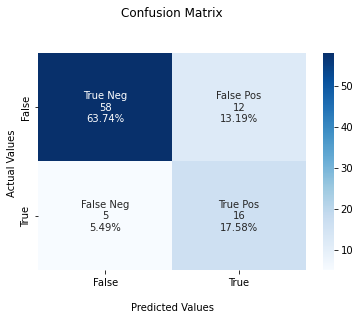

In [30]:
get_metrics(model, X_test, y_test)

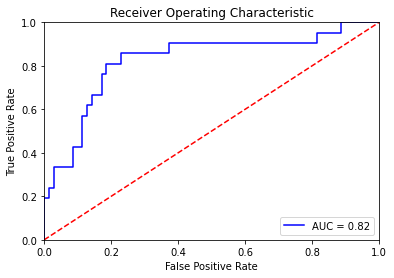

In [31]:
# plot the roc curve

predictions_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions_probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
print("Percentage of Positives detected: " , round((16/21)*100, 2), '%')

Percentage of Positives detected:  76.19 %


In [44]:
print("Fraudelent Claims detected over the dataset: ", round((claims[claims['fraud_reported']==1].shape[0]/claims.shape[0])*0.76*100, 2), '%')

Fraudelent Claims detected over the dataset:  19.65 %
